In [2]:
# prompt: mount gdrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import Libraries and Dataset

In [3]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
import pandas as pd
import zipfile
import urllib.request
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define paths
drive_path = '/content/drive/MyDrive'
zip_path = os.path.join(drive_path, 'dataset_diabetes.zip')
extract_path = os.path.join(drive_path, 'diabetes_data')
csv_path = os.path.join(extract_path, 'diabetic_data.csv')

# Download the dataset if not already downloaded
if not os.path.exists(zip_path):
    print("Downloading dataset...")
    urllib.request.urlretrieve(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip",
        zip_path
    )

# Extract ZIP
if not os.path.exists(csv_path):
    print("Extracting ZIP...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Load CSV
df = pd.read_csv(csv_path)
print("Dataset loaded and stored at:", csv_path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded and stored at: /content/drive/MyDrive/diabetes_data/diabetic_data.csv


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## 2.  Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop unhelpful identifier columns
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

# Drop columns with too much missing data (>50%)
missing = df.isnull().mean()
df.drop(columns=missing[missing > 0.5].index, inplace=True)

# Impute remaining categorical columns (fill NaN with mode)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert target variable: readmitted
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Identify categorical columns
binary_cols = [col for col in df.select_dtypes(include='object').columns if df[col].nunique() == 2]
nominal_cols = [col for col in df.select_dtypes(include='object').columns if df[col].nunique() > 2]

# Label encode binary categorical features
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode nominal features
df = pd.get_dummies(df, columns=nominal_cols)

# Reset index
df.reset_index(drop=True, inplace=True)

# Final shape
print(" Preprocessing complete. Final shape:", df.shape)
df.head()


/tmp/ipython-input-4-27340806.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


✅ Preprocessing complete. Final shape: (101766, 2438)


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up
0,6,25,1,1,41,0,1,0,0,0,...,False,False,False,True,False,False,False,True,False,False
1,1,1,7,3,59,0,18,0,0,0,...,False,False,False,False,False,True,False,True,False,False
2,1,1,7,2,11,5,13,2,0,1,...,False,False,False,True,False,False,False,True,False,False
3,1,1,7,2,44,1,16,0,0,0,...,False,False,False,False,False,True,False,True,False,False
4,1,1,7,1,51,0,8,0,0,0,...,False,False,False,False,True,False,False,True,False,False


## 2.1 Save the Preprocessed Data for Future use

In [ ]:
# Save the cleaned data for future use
cleaned_path = os.path.join(drive_path, 'preprocessed_diabetic_data.csv')
df.to_csv(cleaned_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_path}")


Cleaned dataset saved to: /content/drive/MyDrive/preprocessed_diabetic_data.csv


## 3. Exploratory Data Analysis (Statistics) - Feature Corelation and Target Variable Distribution (Readmitted)

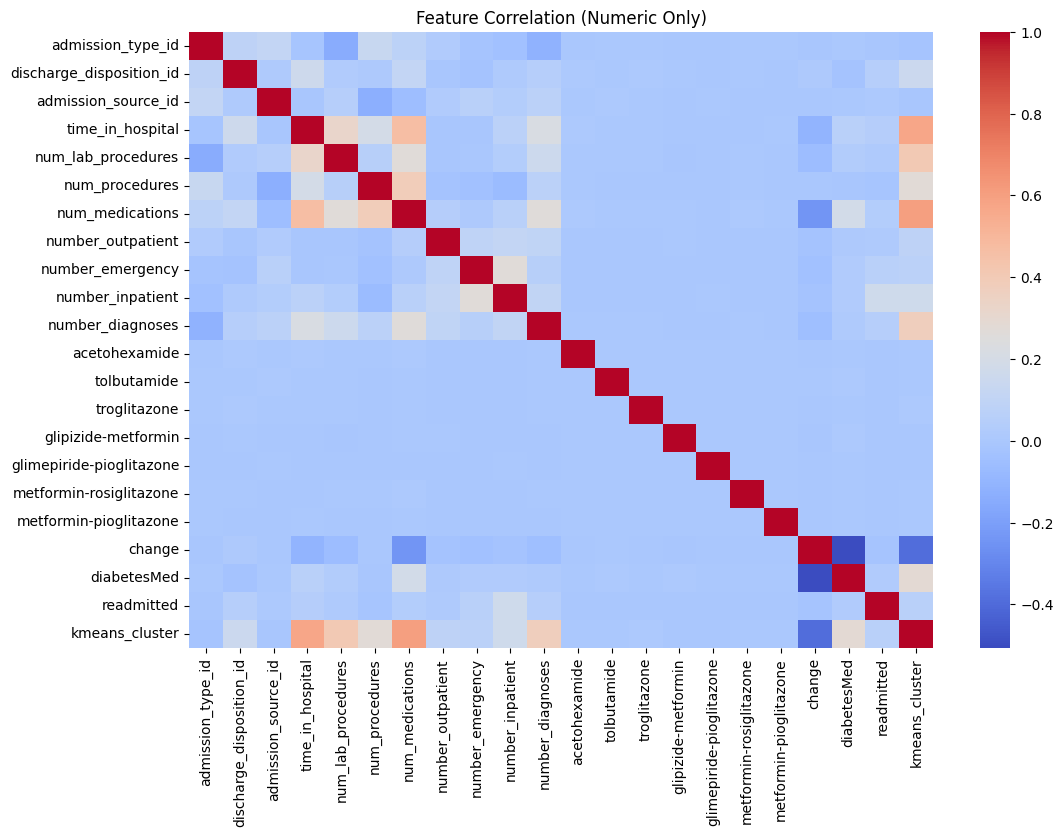

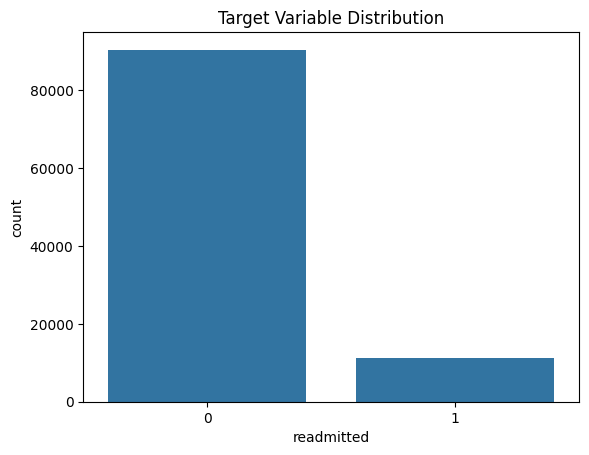

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation (Numeric Only)")
plt.show()


# Distribution of target
sns.countplot(x='readmitted', data=df)
plt.title('Target Variable Distribution')
plt.show()


## 4. Clustering (Unsupervised)

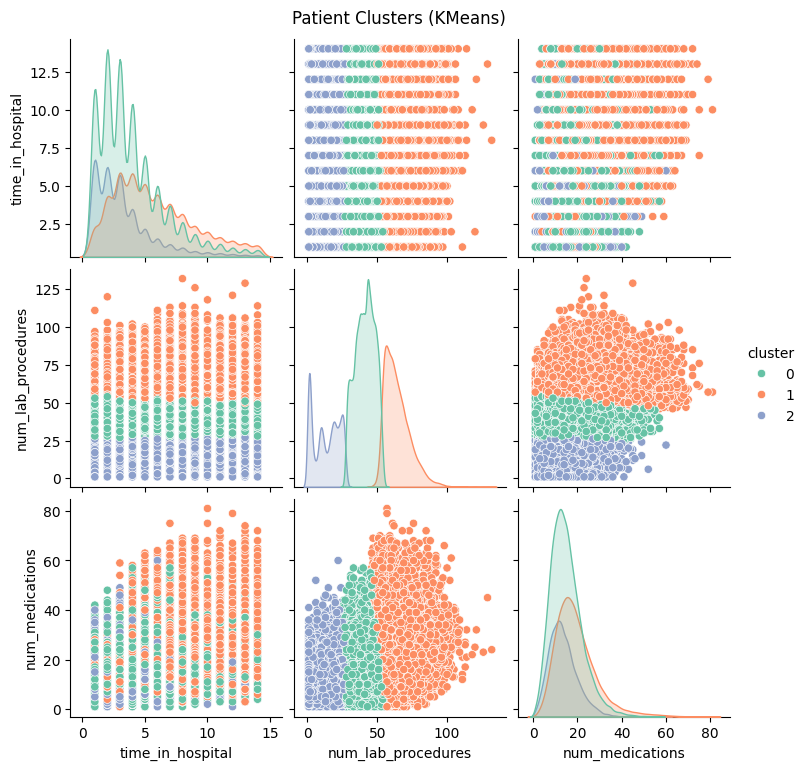

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Use only numeric columns and drop target
X_cluster = df.select_dtypes(include=[np.number]).drop('readmitted', axis=1)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_cluster)

# Visualize clusters using a few key features
selected_features = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'cluster']
sns.pairplot(df[selected_features], hue='cluster', palette='Set2')
plt.suptitle("Patient Clusters (KMeans)", y=1.02)
plt.show()


In [4]:
# prompt: load dataset /content/drive/MyDrive/diabetes_data/preprocessed_diabetic_data.csv to df

df = pd.read_csv('/content/drive/MyDrive/diabetes_data/preprocessed_diabetic_data.csv')
df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up
0,6,25,1,1,41,0,1,0,0,0,...,False,False,False,True,False,False,False,True,False,False
1,1,1,7,3,59,0,18,0,0,0,...,False,False,False,False,False,True,False,True,False,False
2,1,1,7,2,11,5,13,2,0,1,...,False,False,False,True,False,False,False,True,False,False
3,1,1,7,2,44,1,16,0,0,0,...,False,False,False,False,False,True,False,True,False,False
4,1,1,7,1,51,0,8,0,0,0,...,False,False,False,False,True,False,False,True,False,False


In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1️ --- KMeans Clustering on Full Dataset ---
X_kmeans = df.select_dtypes(include=[np.number]).drop('readmitted', axis=1)

scaler_kmeans = StandardScaler()
X_scaled_kmeans = scaler_kmeans.fit_transform(X_kmeans)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled_kmeans)


In [6]:
# 2️ --- Agglomerative Clustering on a 20% Sample with Preserved Index ---
# Preserve original index so we can align with full df later
df_sample = df.sample(frac=0.2, random_state=42).copy()
df_sample['original_index'] = df_sample.index

# Prepare data
X_agglo = df_sample.select_dtypes(include=[np.number]).drop(['readmitted', 'kmeans_cluster'], axis=1)
scaler_agglo = StandardScaler()
X_scaled_agglo = scaler_agglo.fit_transform(X_agglo)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
df_sample['agglo_cluster'] = agglo.fit_predict(X_scaled_agglo)


In [9]:
# 3️ --- PCA for 2D Visualization ---
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X_scaled_agglo)

df_sample['pca_one'] = pca_result[:, 0]
df_sample['pca_two'] = pca_result[:, 1]

# Merge back KMeans cluster labels using original index
df_sample['kmeans_cluster'] = df.loc[df_sample['original_index'], 'kmeans_cluster'].values


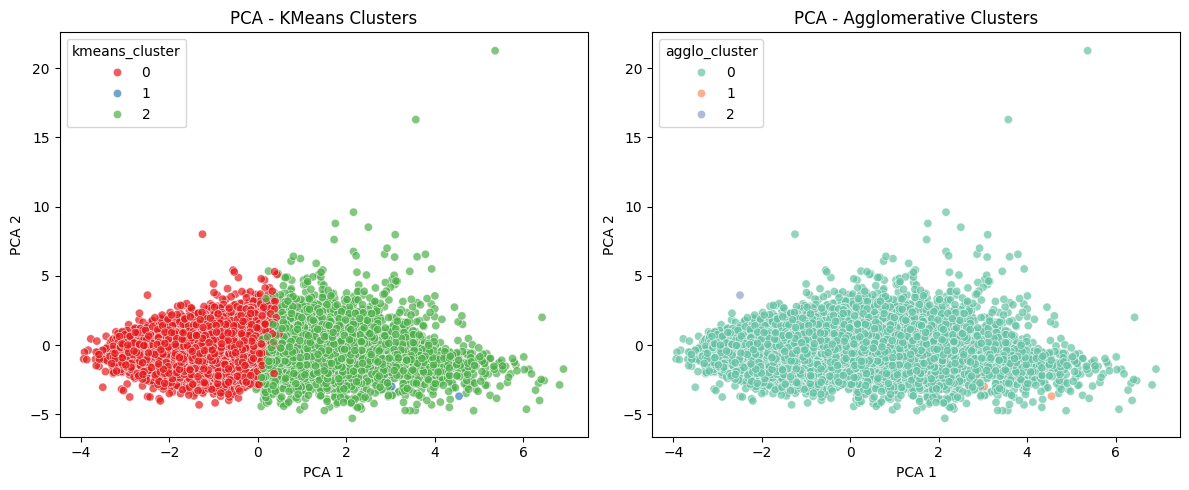

In [10]:
# 4️ --- Plot Both Clusterings Side-by-Side ---
plt.figure(figsize=(12, 5))

# KMeans
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_sample, x='pca_one', y='pca_two',
    hue='kmeans_cluster', palette='Set1', alpha=0.7
)
plt.title('PCA - KMeans Clusters')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')

# Agglomerative
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_sample, x='pca_one', y='pca_two',
    hue='agglo_cluster', palette='Set2', alpha=0.7
)
plt.title('PCA - Agglomerative Clusters')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()


In [11]:
# 5️ --- Cluster-wise Summary Statistics ---
print("\n KMeans Cluster Summary (Full Dataset):")
print(df.groupby('kmeans_cluster')[X_kmeans.columns].mean().round(2))

print("\nAgglomerative Cluster Summary (Sampled Dataset):")
print(df_sample.groupby('agglo_cluster')[X_agglo.columns].mean().round(2))




 KMeans Cluster Summary (Full Dataset):
                admission_type_id  discharge_disposition_id  \
kmeans_cluster                                                
0                            2.05                      3.08   
1                            2.39                      4.35   
2                            1.98                      4.66   

                admission_source_id  time_in_hospital  num_lab_procedures  \
kmeans_cluster                                                              
0                              5.78              2.99               36.47   
1                              7.35              5.00               44.43   
2                              5.72              6.48               52.95   

                num_procedures  num_medications  number_outpatient  \
kmeans_cluster                                                       
0                         0.96            12.00               0.28   
1                         1.22            18.13

In [12]:
# 5. Train Test Split
# Step 1: Make a copy to avoid modifying original
df_model = df.copy()

# Step 2: Drop any unnecessary non-numeric clustering columns (optional)
df_model.drop(columns=['pca_one', 'pca_two'], errors='ignore', inplace=True)

# Step 3: Identify non-numeric columns
non_numeric_cols = df_model.select_dtypes(include='object').columns.tolist()

# Step 4: Encode remaining object (string) columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in non_numeric_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Step 5: Confirm all numeric
print(df_model.dtypes.value_counts())  # Should show only int64, float64


bool     2415
int64      23
int32       1
Name: count, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

# Split features and target
X = df_model.drop('readmitted', axis=1)
y = df_model['readmitted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Train/Test split done:", X_train.shape, X_test.shape)


✅ Train/Test split done: (81412, 2438) (20354, 2438)


In [14]:
# --- [1] Preprocessing ---
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Make a working copy
df_model = df.copy()

# Drop any unused PCA/plotting columns
df_model.drop(columns=['pca_one', 'pca_two'], errors='ignore', inplace=True)

# Encode all categorical features
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# Split features and target
X = df_model.drop('readmitted', axis=1)
y = df_model['readmitted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# 6 .A KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print("KNN Accuracy:", accuracy_score(y_test, knn.predict(X_test_scaled)))


KNN Accuracy: 0.8797779306278865


In [16]:
#6 .B.
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))



Decision Tree Accuracy: 0.823228849366218


In [17]:
# 6 - C
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb.predict(X_test_scaled)))



Naive Bayes Accuracy: 0.1495529134322492


In [18]:
# 6 d) Random Forest (Ensemble)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

Random Forest Accuracy: 0.8877861845337526


In [19]:
# 6 - e) Neural Network

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp.fit(X_train_scaled, y_train)
print("Neural Network Accuracy:", accuracy_score(y_test, mlp.predict(X_test_scaled)))


Neural Network Accuracy: 0.8367397071828633


In [20]:
# 7 . Evaluation

models = {'KNN': knn, 'Decision Tree': dt, 'Naive Bayes': nb, 'Random Forest': rf, 'MLP': mlp}

for name, model in models.items():
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test_scaled if 'scaled' in model.__class__.__name__.lower() else X_test)
    print(classification_report(y_test, y_pred))



Model: KNN


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.12      0.00      0.00      2285

    accuracy                           0.89     20354
   macro avg       0.50      0.50      0.47     20354
weighted avg       0.80      0.89      0.83     20354


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     18069
           1       0.18      0.15      0.16      2285

    accuracy                           0.82     20354
   macro avg       0.53      0.53      0.53     20354
weighted avg       0.81      0.82      0.82     20354


Model: Naive Bayes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.12      0.00      0.00      2285

    accuracy                           0.89     20354
   macro avg       0.51      0.50      0.47     20354
weighted avg       0.80      0.89      0.83     20354


Model: Random Forest
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.55      0.00      0.01      2285

    accuracy                           0.89     20354
   macro avg       0.72      0.50      0.47     20354
weighted avg       0.85      0.89      0.84     20354


Model: MLP


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.00      0.00      0.00      2285

    accuracy                           0.89     20354
   macro avg       0.44      0.50      0.47     20354
weighted avg       0.79      0.89      0.83     20354



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# 7.1 )Optional Testing) from sklearn.metrics import classification_report, accuracy_score

# Dictionary to store results
report_dict = {}

# Evaluation: Loop through each model and get classification report
models = {
    'KNN': (knn, X_test_scaled),
    'Decision Tree': (dt, X_test),
    'Naive Bayes': (nb, X_test_scaled),
    'Random Forest': (rf, X_test),
    'MLP (Neural Net)': (mlp, X_test_scaled)
}

for name, (model, X_eval) in models.items():
    y_pred = model.predict(X_eval)
    report = classification_report(y_test, y_pred, output_dict=True)
    report_dict[name] = report
    print(f"\n Model: {name}")
    print(classification_report(y_test, y_pred))



 Model: KNN
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     18069
           1       0.19      0.02      0.04      2285

    accuracy                           0.88     20354
   macro avg       0.54      0.50      0.49     20354
weighted avg       0.81      0.88      0.84     20354


 Model: Decision Tree
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     18069
           1       0.18      0.15      0.16      2285

    accuracy                           0.82     20354
   macro avg       0.53      0.53      0.53     20354
weighted avg       0.81      0.82      0.82     20354


 Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.93      0.05      0.09     18069
           1       0.11      0.97      0.20      2285

    accuracy                           0.15     20354
   macro avg       0.52      0.51      0.15     20354
weighted avg     

In [22]:
# 7.2 Optional Testing

import pandas as pd

# Create a summary DataFrame for 'weighted avg' precision, recall, f1-score
summary_df = pd.DataFrame({
    model: {
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'Accuracy': report['accuracy']
    }
    for model, report in report_dict.items()
}).T.round(3)

print("\n📈 Model Comparison Summary:")
display(summary_df)



📈 Model Comparison Summary:


,Precision,Recall,F1-Score,Accuracy
KNN,0.810,0.880,0.835,0.880
Decision Tree,0.814,0.823,0.818,0.823
Naive Bayes,0.837,0.150,0.100,0.150
Random Forest,0.850,0.888,0.836,0.888
MLP (Neural Net),0.812,0.837,0.824,0.837


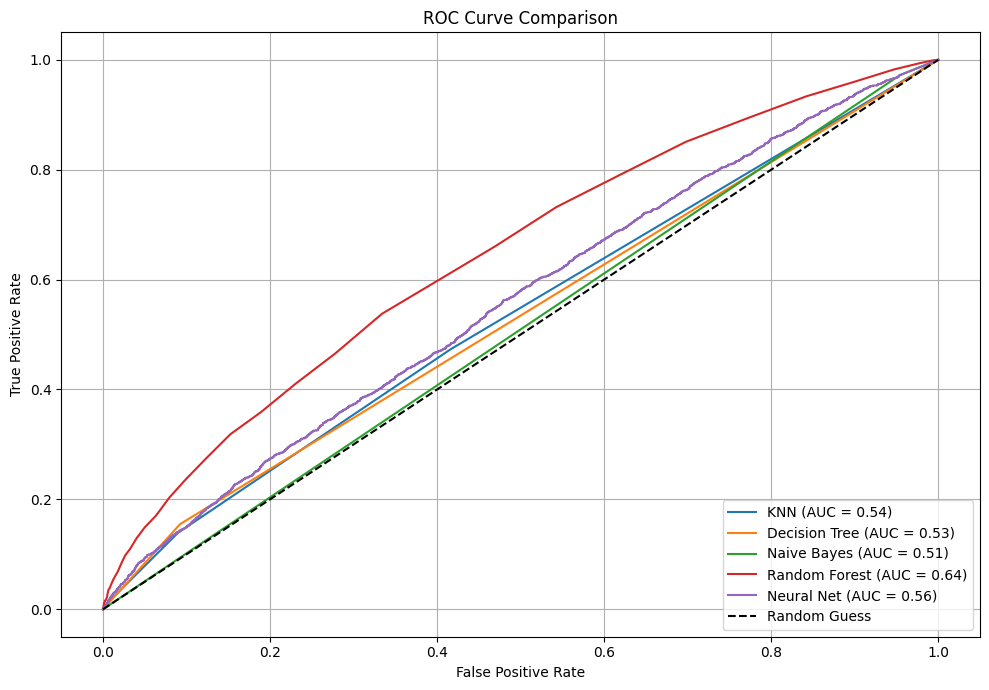

In [24]:
# 7.3 AUC ROC Curve Comparison
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize target for ROC analysis (if not already 0/1)
y_test_bin = label_binarize(y_test, classes=[0, 1]).ravel()

# Dictionary of models and their input data (scaled or not)
models = {
    'KNN': (knn, X_test_scaled),
    'Decision Tree': (dt, X_test),
    'Naive Bayes': (nb, X_test_scaled),
    'Random Forest': (rf, X_test),
    'Neural Net': (mlp, X_test_scaled)
}

# Plotting
plt.figure(figsize=(10, 7))

for name, (model, X_eval) in models.items():
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_eval)[:, 1]
    elif hasattr(model, "decision_function"):
        y_probs = model.decision_function(X_eval)
    else:
        continue  # Skip model if it doesn't support probability estimation

    fpr, tpr, _ = roc_curve(y_test_bin, y_probs)
    auc = roc_auc_score(y_test_bin, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Plot formatting
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


## Do not run below at the moment move to NEXT code.

In [23]:
# 8. Association Rule Mining (frequent procedures)

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Example: frequent medications (dummy)
transactions = df[['medication_1', 'medication_2', 'medication_3']].astype(str).values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_freq = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_freq, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()


KeyError: "None of [Index(['medication_1', 'medication_2', 'medication_3'], dtype='object')] are in the [columns]"

In [25]:
# List of potential procedure-related column names
expected_columns = ['procedure_1', 'procedure_2', 'procedure_3']

# Check for existence in the dataset
available = [col for col in expected_columns if col in df.columns]
missing = [col for col in expected_columns if col not in df.columns]

print("🔍 Column Check for Procedure Fields:")
print("-----------------------------------")
if available:
    print(f"✅ Found columns: {available}")
else:
    print("❌ No expected procedure columns found.")

if missing:
    print(f"⚠️ Missing columns: {missing}")

# Suggest alternatives based on column names in your dataset
print("\n📋 Available columns that may be alternatives:")
possible_alternatives = [col for col in df.columns if any(key in col.lower() for key in ['procedure', 'diag', 'med'])]
print(possible_alternatives if possible_alternatives else "No clear alternatives found.")


🔍 Column Check for Procedure Fields:
-----------------------------------
❌ No expected procedure columns found.
⚠️ Missing columns: ['procedure_1', 'procedure_2', 'procedure_3']

📋 Available columns that may be alternatives:
['num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'diabetesMed', 'medical_specialty_AllergyandImmunology', 'medical_specialty_Anesthesiology', 'medical_specialty_Anesthesiology-Pediatric', 'medical_specialty_Cardiology', 'medical_specialty_Cardiology-Pediatric', 'medical_specialty_DCPTEAM', 'medical_specialty_Dentistry', 'medical_specialty_Dermatology', 'medical_specialty_Emergency/Trauma', 'medical_specialty_Endocrinology', 'medical_specialty_Endocrinology-Metabolism', 'medical_specialty_Family/GeneralPractice', 'medical_specialty_Gastroenterology', 'medical_specialty_Gynecology', 'medical_specialty_Hematology', 'medical_specialty_Hematology/Oncology', 'medical_specialty_Hospitalist', 'medical_specialty_InfectiousDiseases', 'medical_s

In [26]:
#8.0
!pip install mlxtend --quiet

In [27]:
import pandas as pd

# 1. Binary flag: has_procedure
df['has_procedure'] = (df['num_procedures'] > 0).astype(int)

# 2. Ordinal intensity flag based on num_procedures
df['procedure_intensity'] = pd.cut(
    df['num_procedures'],
    bins=[-1, 0, 2, 4, float('inf')],
    labels=['None', 'Low', 'Moderate', 'High']
)

# 3. Map specialty groups to simplified procedure types
surgical_specialties = [
    'medical_specialty_Surgery-General',
    'medical_specialty_Surgery-Cardiovascular',
    'medical_specialty_Surgery-Cardiovascular/Thoracic',
    'medical_specialty_Surgery-Colon&Rectal',
    'medical_specialty_Surgery-Neuro',
    'medical_specialty_Surgery-Orthopedics',
    'medical_specialty_Surgery-Vascular',
    'medical_specialty_Surgeon'
]

diagnostic_specialties = [
    'medical_specialty_Radiology',
    'medical_specialty_Pathology',
    'medical_specialty_Emergency/Trauma'
]

therapy_specialties = [
    'medical_specialty_Psychiatry',
    'medical_specialty_PhysicalMedicineandRehabilitation',
    'medical_specialty_Endocrinology',
    'medical_specialty_Nephrology'
]

# Function to assign simplified procedure type
def infer_procedure_type(row):
    if any(row.get(spec, 0) == 1 for spec in surgical_specialties):
        return 'Surgical'
    elif any(row.get(spec, 0) == 1 for spec in diagnostic_specialties):
        return 'Diagnostic'
    elif any(row.get(spec, 0) == 1 for spec in therapy_specialties):
        return 'Therapeutic'
    else:
        return 'General'

df['procedure_type'] = df.apply(infer_procedure_type, axis=1)


/tmp/ipython-input-28-1882724378.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='procedure_intensity', data=df, palette='coolwarm')


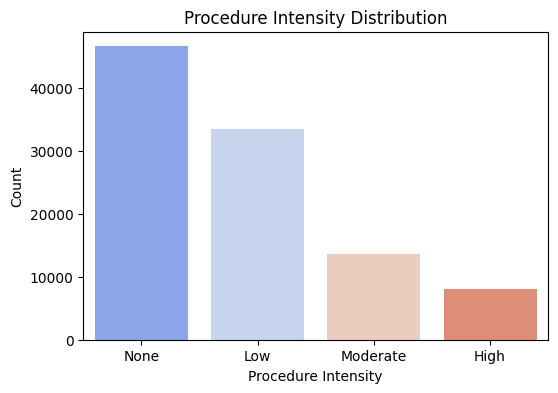

/tmp/ipython-input-28-1882724378.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='procedure_type', data=df, palette='Set2')


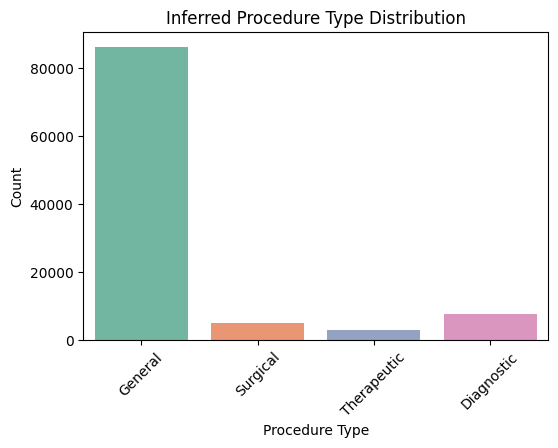

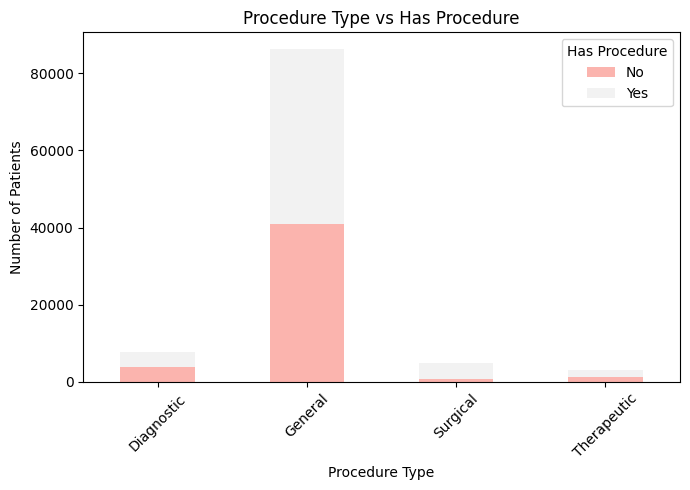

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Procedure Intensity Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='procedure_intensity', data=df, palette='coolwarm')
plt.title('Procedure Intensity Distribution')
plt.xlabel('Procedure Intensity')
plt.ylabel('Count')
plt.show()

# Plot 2: Procedure Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='procedure_type', data=df, palette='Set2')
plt.title('Inferred Procedure Type Distribution')
plt.xlabel('Procedure Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Procedure Type vs Has Procedure (Stacked)
cross_tab = pd.crosstab(df['procedure_type'], df['has_procedure'])
cross_tab.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(7,5))
plt.title('Procedure Type vs Has Procedure')
plt.xlabel('Procedure Type')
plt.ylabel('Number of Patients')
plt.legend(title='Has Procedure', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Sample items for mining (simplified to meaningful groupings)
df_rules = df[['procedure_intensity', 'procedure_type', 'has_procedure']].copy()

# Convert all to string
df_rules = df_rules.astype(str)

# Create list of transactions (each row is a set of items)
transactions = df_rules.values.tolist()

# Encode with TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Sort rules by lift and confidence
rules = rules.sort_values(by=["lift", "confidence"], ascending=False)

# Show top rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


        antecedents      consequents   support  confidence      lift
1               (0)           (None)  0.458424    1.000000  2.181386
2            (None)              (0)  0.458424    1.000000  2.181386
12     (0, General)           (None)  0.401185    1.000000  2.181386
14  (General, None)              (0)  0.401185    1.000000  2.181386
15              (0)  (General, None)  0.401185    0.875139  2.181386
16           (None)     (0, General)  0.401185    0.875139  2.181386
19           (High)     (General, 1)  0.069267    0.877615  1.966343
6               (1)            (Low)  0.328784    0.607087  1.846464
4            (High)              (1)  0.078926    1.000000  1.846464
5             (Low)              (1)  0.328784    1.000000  1.846464


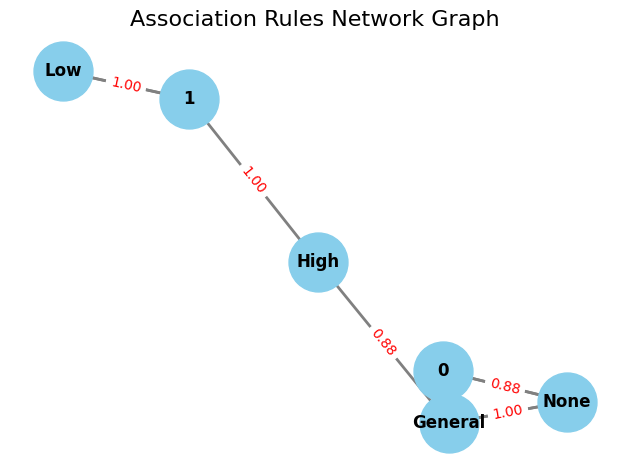

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your rules DataFrame looks like this:
# rules = pd.DataFrame([...])  # Your rules data

# Use top 10 rules or all if less
top_rules = rules.head(10)

G = nx.DiGraph()

# Add edges: from each antecedent item to each consequent item
for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(str(antecedent), str(consequent), weight=row['lift'], label=f"{row['confidence']:.2f}")

# Position nodes using spring layout for good spacing
pos = nx.spring_layout(G, k=0.7, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1800, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', width=2)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw edge labels (confidence)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

plt.title("Association Rules Network Graph", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


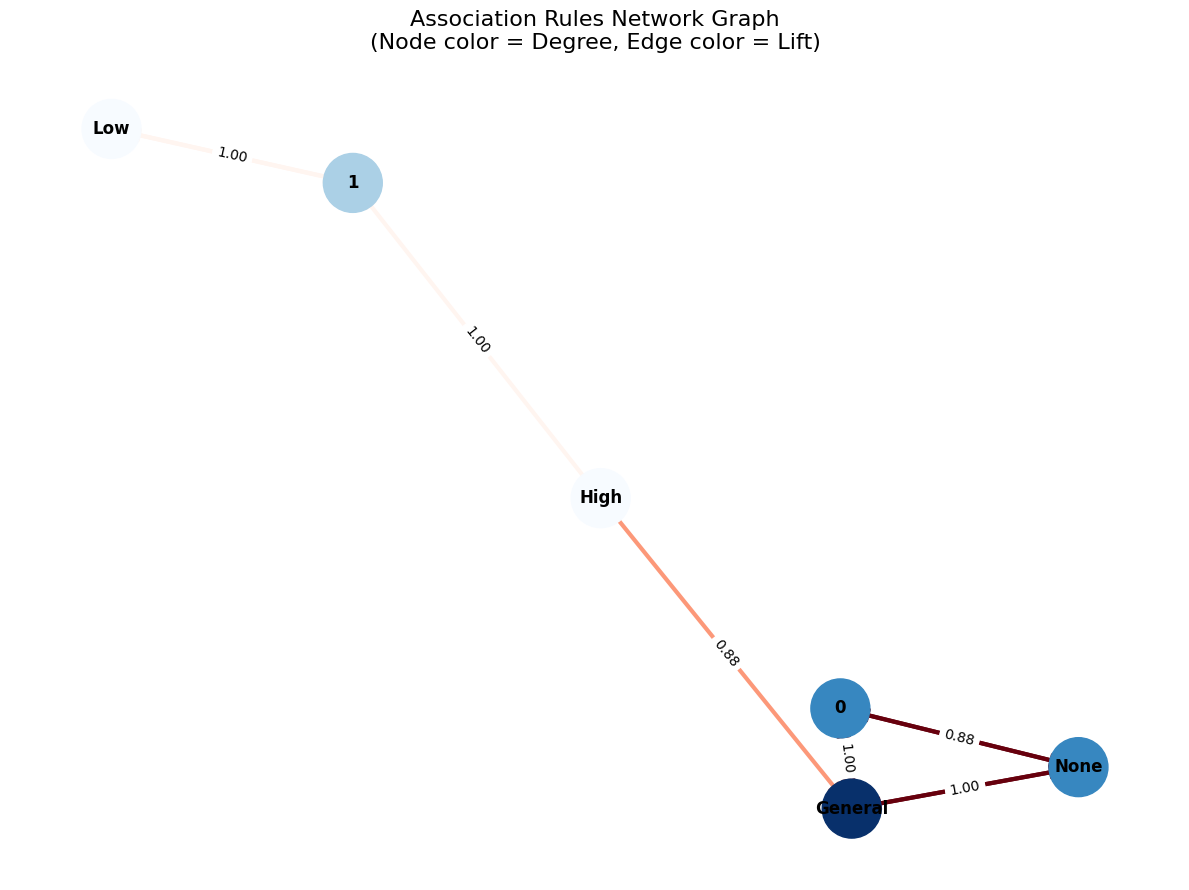

Network graph saved as 'association_rules_network.png'


In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Example: your rules DataFrame (replace this with your actual rules DataFrame)
# rules = pd.DataFrame({
#     'antecedents': [...],
#     'consequents': [...],
#     'support': [...],
#     'confidence': [...],
#     'lift': [...]
# })

# Select rules you want to visualize (top 10 here)
top_rules = rules.head(10)

G = nx.DiGraph()

# Add edges with lift as edge attribute
for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(str(antecedent), str(consequent), weight=row['lift'], support=row['support'], confidence=row['confidence'])

# Positions for all nodes
pos = nx.spring_layout(G, k=0.7, seed=42)

# Node coloring: by degree (number of edges connected to node)
degrees = dict(G.degree())
max_degree = max(degrees.values()) if degrees else 1
node_colors = [degrees[node] / max_degree for node in G.nodes()]

# Normalize node colors to a colormap (Blues)
norm_nodes = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
cmap_nodes = cm.Blues

# Edge coloring: by lift value
lift_values = [edata['weight'] for _, _, edata in G.edges(data=True)]
min_lift, max_lift = min(lift_values), max(lift_values)
norm_edges = mcolors.Normalize(vmin=min_lift, vmax=max_lift)
cmap_edges = cm.Reds

# Map node and edge colors
node_color_mapped = [cmap_nodes(norm_nodes(c)) for c in node_colors]
edge_color_mapped = [cmap_edges(norm_edges(edata['weight'])) for _, _, edata in G.edges(data=True)]

plt.figure(figsize=(12, 9))

# Draw nodes with color map
nx.draw_networkx_nodes(G, pos, node_size=1800, node_color=node_color_mapped)

# Draw edges with color map
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color=edge_color_mapped, width=3)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw edge labels as confidence values
edge_labels = {(u, v): f"{edata['confidence']:.2f}" for u, v, edata in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)

plt.title("Association Rules Network Graph\n(Node color = Degree, Edge color = Lift)", fontsize=16)
plt.axis('off')
plt.tight_layout()

# Save figure to file
plt.savefig("association_rules_network.png", format="png", dpi=300)
plt.show()

print("Network graph saved as 'association_rules_network.png'")
